<a href="https://colab.research.google.com/github/matsonah/ClarkeStatsSpring2022/blob/main/PayGap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
gender = read.csv(url("https://gender-pay-gap.service.gov.uk/viewing/download-data/2021"))
names(gender)
# Read about calculations: https://www.gov.uk/guidance/making-your-gender-pay-gap-calculations#overview 
backup = gender
# DiffMeanHourlyPercent: (Avg Men Paid - Avg Women Paid)/ Avg Men Paid. (Men are paid 1 pound -> Women are paid this many pence less)

[1] "EmployerName"              "EmployerId"               
 [3] "Address"                   "PostCode"                 
 [5] "CompanyNumber"             "SicCodes"                 
 [7] "DiffMeanHourlyPercent"     "DiffMedianHourlyPercent"  
 [9] "DiffMeanBonusPercent"      "DiffMedianBonusPercent"   
[11] "MaleBonusPercent"          "FemaleBonusPercent"       
[13] "MaleLowerQuartile"         "FemaleLowerQuartile"      
[15] "MaleLowerMiddleQuartile"   "FemaleLowerMiddleQuartile"
[17] "MaleUpperMiddleQuartile"   "FemaleUpperMiddleQuartile"
[19] "MaleTopQuartile"           "FemaleTopQuartile"        
[21] "CompanyLinkToGPGInfo"      "ResponsiblePerson"        
[23] "EmployerSize"              "CurrentName"              
[25] "SubmittedAfterTheDeadline" "DueDate"                  
[27] "DateSubmitted"

Number of outliers: 4.

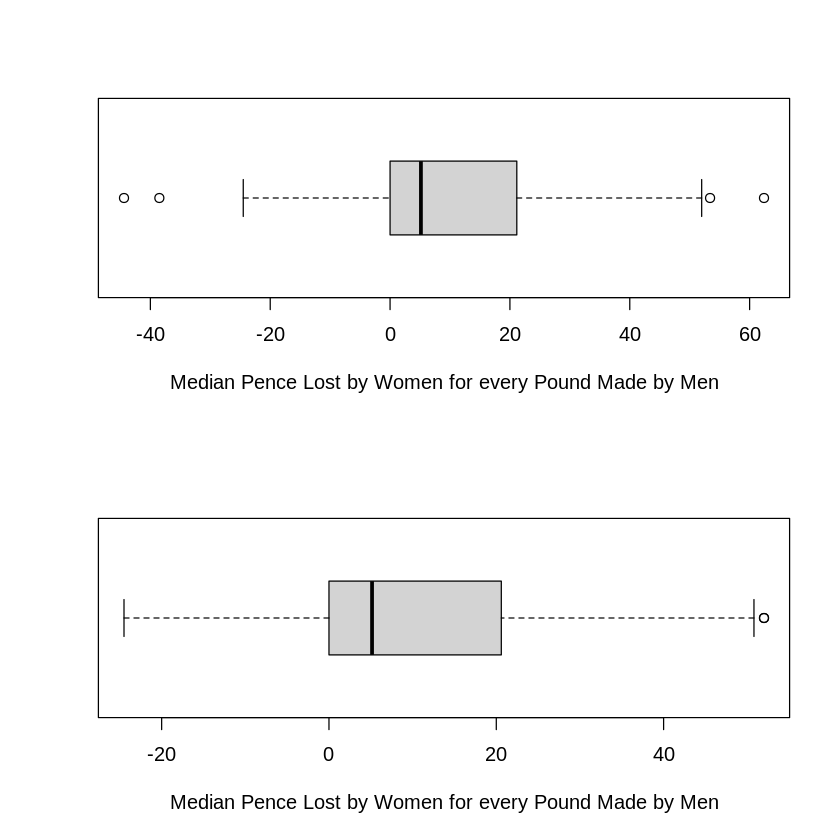

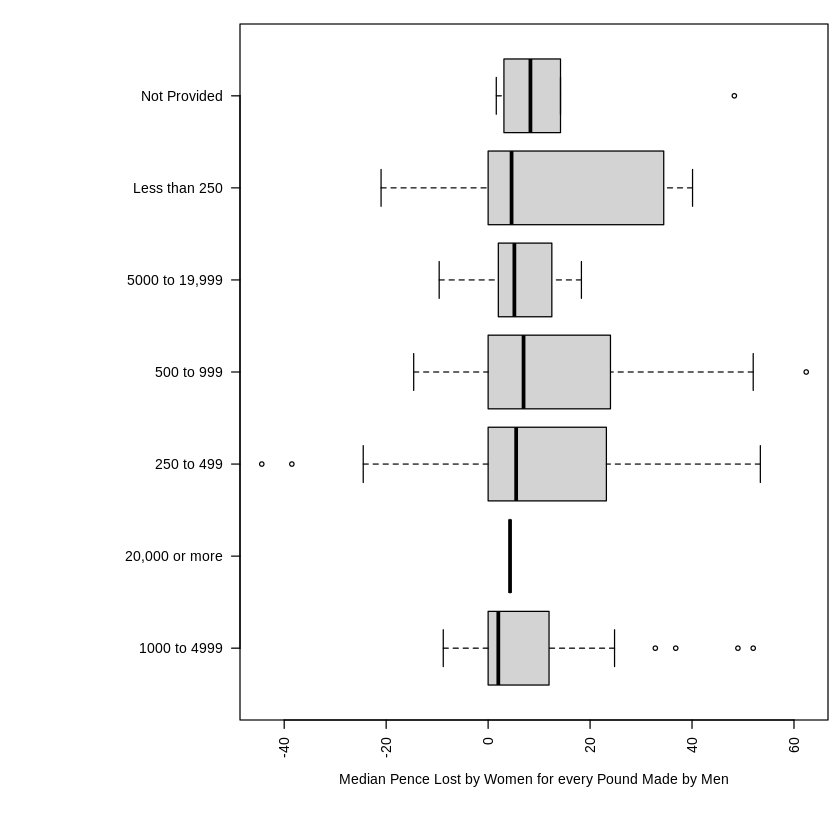

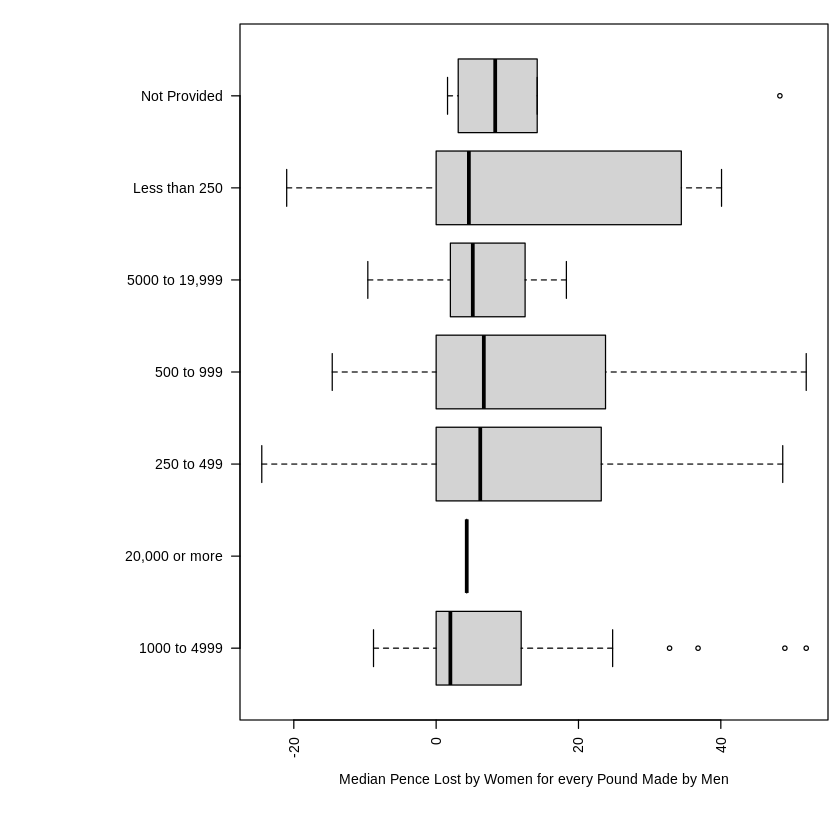

In [2]:
gender$column = gender$DiffMedianHourlyPercent
labels = c("Median Pence Lost by Women for every Pound Made by Men")
sample_size = 200

focus = subset(gender, !is.na(gender$column))
selection = sample(1:length(focus$column), sample_size)
mydata = focus[selection,]

glance = summary(mydata$column)
first = as.numeric(glance[2])
third = as.numeric(glance[5])
lb = first - 1.5*(third - first)
ub = third + 1.5*(third - first)
outliers = subset(mydata, mydata$column < lb | mydata$column > ub)
insides = subset(mydata, mydata$column >= lb & mydata$column <= ub)
cat(sep="", "Number of outliers: ", length(outliers$column),".")

par(mfrow=c(2,1)) 
boxplot(mydata$column, horizontal=T, ylab="", xlab=labels)
boxplot(insides$column, horizontal=T,ylab="", xlab=labels)

par(mfrow=c(1,1),cex=0.7, mai=c(1, 2, 0.2, 0.1))
boxplot(mydata$column~mydata$EmployerSize, horizontal=T, las=2, ylab="", xlab=labels)
boxplot(insides$column~insides$EmployerSize, horizontal=T, las=2, ylab="", xlab=labels)

In [ ]:
small = subset(mydata, mydata$EmployerSize == "20,000 or more") 
small$EmployerName

[1] "SAFEWAY STORES LIMITED"         "UK Statistics Authority"       
[3] "SERCO LIMITED"                  "WM MORRISON SUPERMARKETS P L C"

In [ ]:
outliers$EmployerName

[1] "RMET"                                           
[2] "QUEENSWOOD SCHOOL LIMITED"                      
[3] "CAVENDISH LEARNING TRUST"                       
[4] "BRAND ENERGY & INFRASTRUCTURE SERVICES UK, LTD."
[5] "DALES ACADEMIES TRUST"